In [1]:
# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd
import numpy as np

# Gráficos
# ------------------------------------------------------------------------------
import seaborn as sns
import matplotlib.pyplot as plt

# Transformación de los datos
# ------------------------------------------------------------------------------
from scipy import stats
import math 
from sklearn.preprocessing import MinMaxScaler

# Para la gestión de los warning
# ------------------------------------------------------------------------------
import warnings
warnings.filterwarnings('ignore')

# Para poder ver todas las columnas del dataframe
# ------------------------------------------------------------------------------
pd.options.display.max_columns = None 

# Pair Programming Normalización

- En este ejercicio de pair programming seguiréis usando el dataset que seleccionasteis.
- En vuestro dataset habréis identificado unas variables predictoras y una variable respuesta. 

### Los objetivos del pair programming de hoy son:

Sobre la variable **respuesta**, en pair programmings anterior identificastéis si seguía una distribución normal o no. 
En caso de que **no** siguiera una distribución normal, **normalizarla**. 

Podéis usar el método que prefiráis o el que mejor se ajuste
Guardar en un csv el nuevo dataframe que habéis creado para seguir usándolo en los siguientes pair programmings

In [2]:
df = pd.read_csv("data/03-primas_bajas.csv", index_col = 0)
df.head(2)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.9240
1,18,male,33.77,1,no,southeast,1725.5523


# Vemos nuestros datos

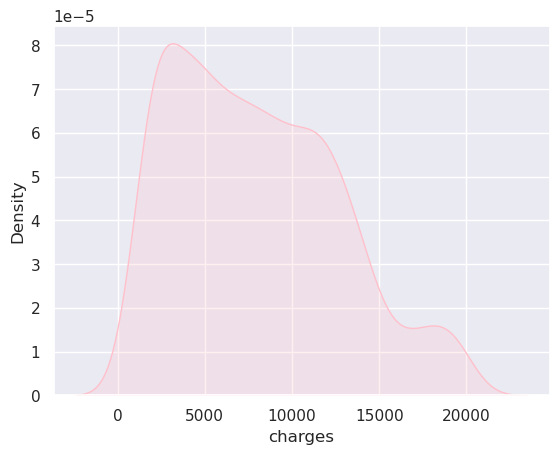

In [3]:
sns.set(style="ticks")
sns.set_style("darkgrid")
sns.distplot(
    df["charges"], 
    hist = False, 
    color = "pink", 
    kde_kws = {"shade": True, "linewidth": 1});

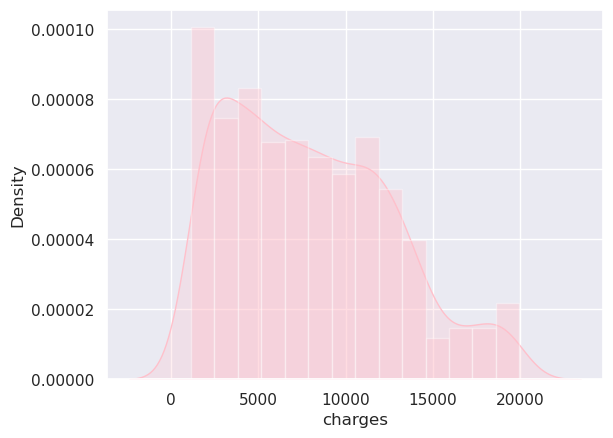

In [4]:
sns.set(style="ticks")
sns.set_style("darkgrid")
sns.distplot(
    df["charges"], 
    #hist = False, 
    color = "pink", 
    kde_kws = {"shade": True, "linewidth": 1});

vemos sin dudas que nuestros datos no son normales, aunque para terminar de verlo hacemos el test shapiro paa corroborar lo que estamos viendo

In [5]:
stats.shapiro(df["charges"])

ShapiroResult(statistic=0.9519296288490295, pvalue=3.637755045551004e-18)

Vemos que **p-valor < 0.05** , rechazamos la hipotesis nulas, y por tanto, nuestros datos no son normales.

# Vamosa normalizarla probamos primero con el método manual

In [6]:
# vamos a crear distintas variables con los estadísticos que necesitamos

media = df["charges"].mean()
maximo = df["charges"].max() 
minimo = df["charges"].min()

In [7]:
# vamos a crearnos una columna nueva con el resultado de la normalización

df["charges_norma"] = (df["charges"] - media) / (maximo - minimo )

In [8]:
df.head(2)

,age,sex,bmi,children,smoker,region,charges,charges_norma
0,19,female,27.90,0,yes,southwest,16884.9240,0.473310
1,18,male,33.77,1,no,southeast,1725.5523,-0.331205


Hacemos la visualización para ver si se han normalizado

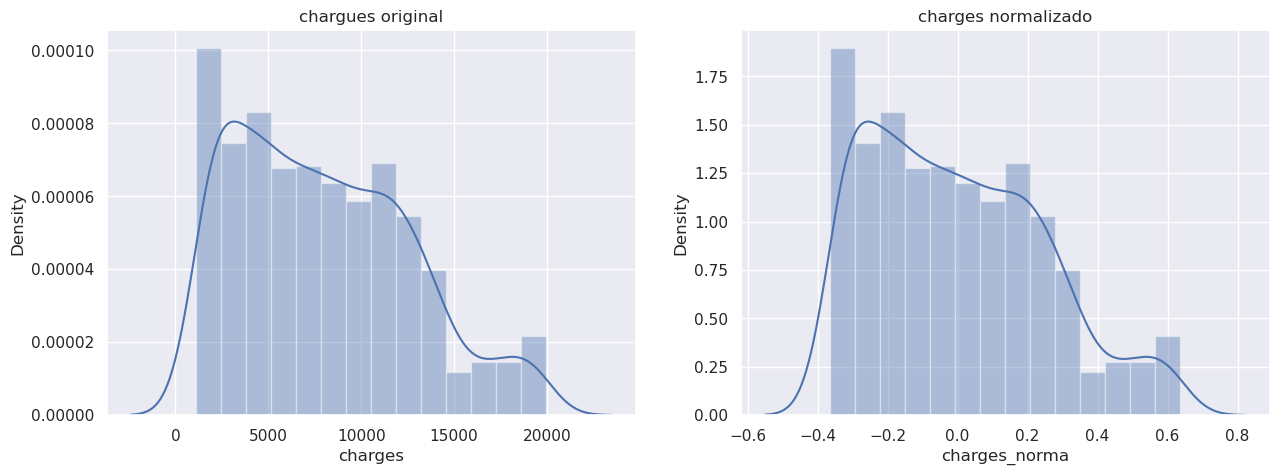

In [9]:
fig, axes = plt.subplots(1, 2, figsize = (15,5))

axes[0].set_title('chargues original')
axes[1].set_title('charges normalizado')

sns.distplot(df['charges'] ,ax = axes[0])
sns.distplot(df["charges_norma"], ax = axes[1]);

In [10]:
stats.shapiro(df["charges"])

ShapiroResult(statistic=0.9519296288490295, pvalue=3.637755045551004e-18)

No ha dado resultado pasamos a realizar otros métodos

logaritmica, que no se puede aplicar si tenemos algun valor que sea 0 por lo tanto hacemos esta list comprehension para evitar este posible error

In [11]:
df["charges_log"] = df["charges"].apply(lambda x: np.log(x) if x > 0 else 0)

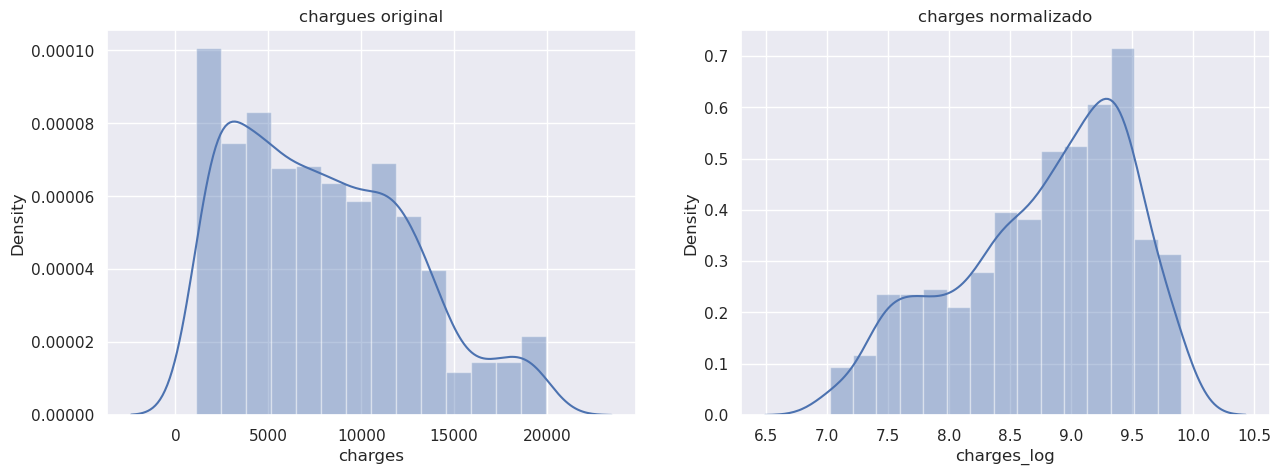

In [12]:
fig, axes = plt.subplots(1, 2, figsize = (15,5))

axes[0].set_title('chargues original')
axes[1].set_title('charges normalizado')

sns.distplot(df['charges'] ,ax = axes[0])
sns.distplot(df["charges_log"], ax = axes[1]);

In [13]:
stats.shapiro(df["charges_log"])

ShapiroResult(statistic=0.9519430994987488, pvalue=3.659914386980687e-18)

De nuevo p-valor es menor que 0.05 seguimos probamdo aproximaciones.

Raiz cuadrada

In [14]:
df["charges_raiz"] = df["charges"].apply(lambda x: math.sqrt(x))

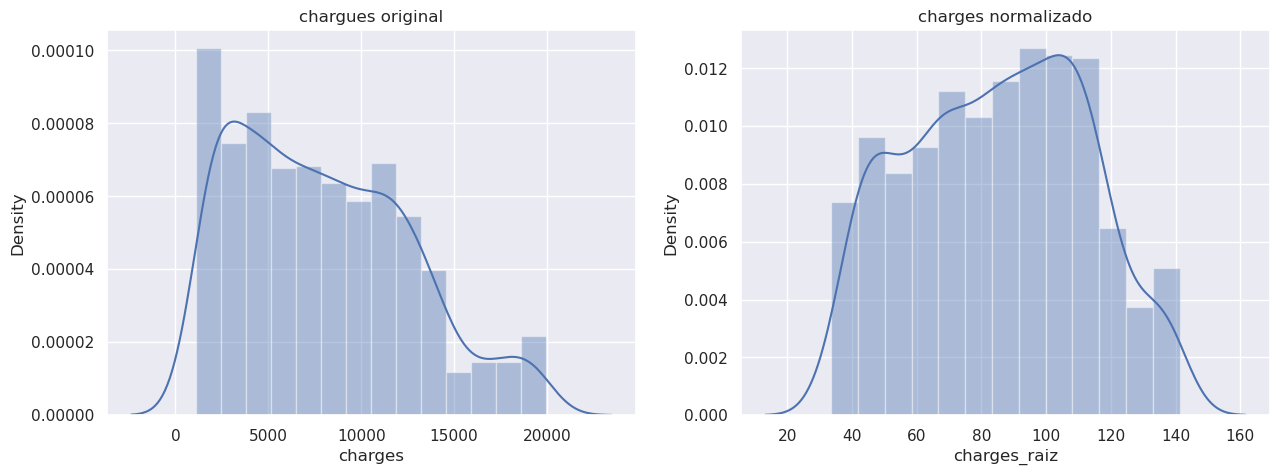

In [15]:
fig, axes = plt.subplots(1, 2, figsize = (15,5))

axes[0].set_title('chargues original')
axes[1].set_title('charges normalizado')

sns.distplot(df['charges'] ,ax = axes[0])
sns.distplot(df["charges_raiz"], ax = axes[1]);

In [16]:
stats.shapiro(df["charges_raiz"])

ShapiroResult(statistic=0.9747189879417419, pvalue=1.149044184453607e-12)

Seguimos igual

# Método stats.boxcox

In [17]:
df['charges_box'], lambda_ajustada = stats.boxcox(df['charges'])

In [18]:
# el valor de lambda en esta tranformación sería
lambda_ajustada

0.40436509383315017

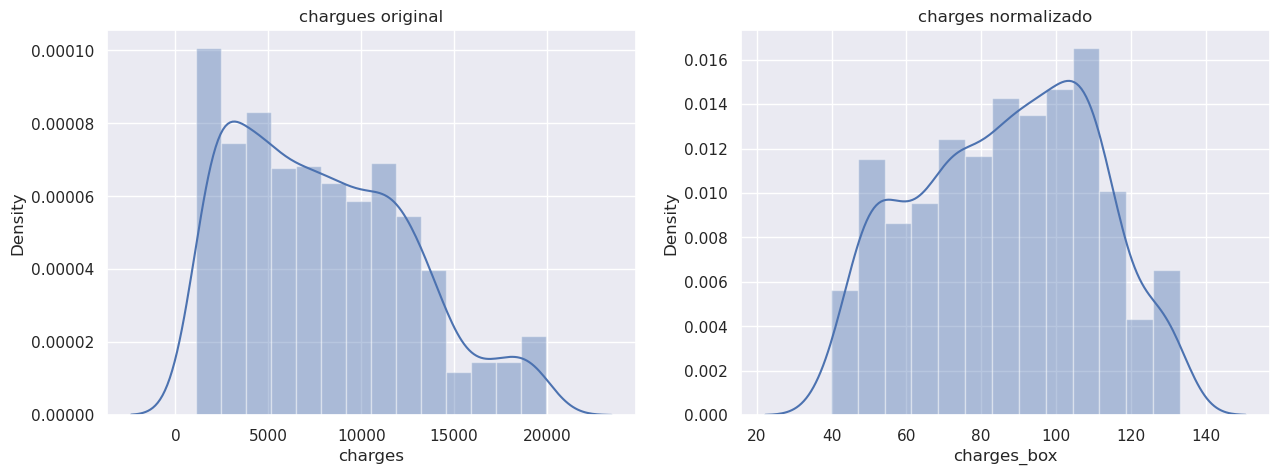

In [19]:
fig, axes = plt.subplots(1, 2, figsize = (15,5))

axes[0].set_title('chargues original')
axes[1].set_title('charges normalizado')

sns.distplot(df['charges'] ,ax = axes[0])
sns.distplot(df["charges_box"], ax = axes[1]);

In [20]:
stats.shapiro(df["charges_box"])

ShapiroResult(statistic=0.9741802215576172, pvalue=7.890922615848284e-13)

Seguimos igual

# Sklearn MinMaxScaller

In [21]:
# extraemos las columnas numéricas
numericas = df.select_dtypes(include = np.number)

In [22]:
# construir el modelo de escalador
minmax = MinMaxScaler()

In [23]:
# ajustamos el modelo utilizando nuestro set de datos
minmax.fit(df[['charges']])

MinMaxScaler()

In [24]:
# transformamos los datos
X_normalizadas = minmax.transform(df[["charges"]])

In [25]:
# Vamos a verificar los valores mínimos después de la normalización
X_normalizadas.min(axis=0)

array([0.])

In [26]:
# y los máximos?
X_normalizadas.max(axis=0)

array([1.])

Ya estan en la misma escala entre 0 y 1 

In [27]:
# por último convertiremos el array que nos devuelve en un dataframe. 

numericas_minmax = pd.DataFrame(X_normalizadas, columns = ["charges_Sklearn"])
numericas_minmax.head(2)

,charges_Sklearn
0,0.836552
1,0.032037


In [28]:
# incorporamos la columna al dataframe 

df["charges_Sklearn"] = numericas_minmax
df.head(2)

,age,sex,bmi,children,smoker,region,charges,charges_norma,charges_log,charges_raiz,charges_box,charges_Sklearn
0,19,female,27.90,0,yes,southwest,16884.9240,0.473310,9.734176,129.942002,124.198634,0.836552
1,18,male,33.77,1,no,southeast,1725.5523,-0.331205,7.453302,41.539768,47.891784,0.032037


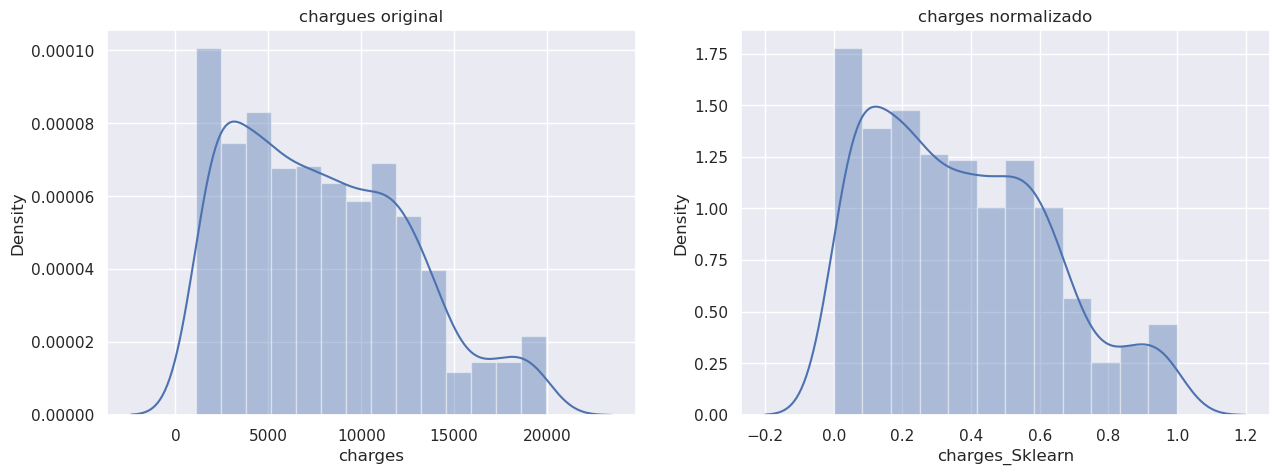

In [29]:
fig, axes = plt.subplots(1, 2, figsize = (15,5))

axes[0].set_title('chargues original')
axes[1].set_title('charges normalizado')

sns.distplot(df['charges'] ,ax = axes[0])
sns.distplot(df["charges_Sklearn"], ax = axes[1]);

In [30]:
stats.shapiro(df["charges_Sklearn"])

ShapiroResult(statistic=nan, pvalue=1.0)

In [32]:
df.head(2)

,age,sex,bmi,children,smoker,region,charges,charges_norma,charges_log,charges_raiz,charges_box,charges_Sklearn
0,19,female,27.90,0,yes,southwest,16884.9240,0.473310,9.734176,129.942002,124.198634,0.836552
1,18,male,33.77,1,no,southeast,1725.5523,-0.331205,7.453302,41.539768,47.891784,0.032037


Limpiamos las nuevas columnas de nuestro df y dejamso solo esta última.

In [33]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges',
       'charges_norma', 'charges_log', 'charges_raiz', 'charges_box',
       'charges_Sklearn'],
      dtype='object')

In [35]:
df.drop(['charges_norma', 'charges_log', 'charges_raiz', 'charges_box'], axis =1, inplace=True)

In [36]:
df.head(2)

,age,sex,bmi,children,smoker,region,charges,charges_Sklearn
0,19,female,27.90,0,yes,southwest,16884.9240,0.836552
1,18,male,33.77,1,no,southeast,1725.5523,0.032037


# Genial

Ha funcionado, nuestro p-valor es mayor que 0.05 y por tanto nuestros datos se han normalizado.

In [37]:
#guardamos el csv

df.to_csv("data/05-primas_normalizadas.csv")